In [1]:
# 1. IMPORT LIBRARY
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# 2. LOAD DATASET
df = pd.read_csv("SpotifyFeatures.csv")  # pastikan file ini ada di folder yang sama

# 3. PILIH FITUR YANG DIPAKAI
feature_cols = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

# 4. AMBIL SUBSET DATA UNTUK HEMAT MEMORI
df_subset = df.sample(n=5000, random_state=42).reset_index(drop=True)

# 5. NORMALISASI FITUR
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset[feature_cols])

# 6. HITUNG SIMILARITY MATRIX
similarity_matrix = cosine_similarity(scaled_features)

# 7. SIMPAN REFERENSI LAGU
track_refs = df_subset[['track_name', 'artist_name']].reset_index(drop=True)

# 8. FUNGSI UNTUK MEREKOMENDASIKAN LAGU MIRIP
def recommend_similar_songs(track_name, artist_name, refs, similarity_matrix, top_n=5):
    # Cari index lagu yang dimaksud
    match = refs[
        (refs['track_name'].str.lower() == track_name.lower()) &
        (refs['artist_name'].str.lower() == artist_name.lower())
    ]
    
    if match.empty:
        return f"Lagu '{track_name}' oleh '{artist_name}' tidak ditemukan dalam subset data."

    idx = match.index[0]
    
    # Ambil skor kemiripan
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # skip lagu itu sendiri
    
    # Ambil informasi lagu hasil rekomendasi
    recommendations = refs.iloc[[i[0] for i in sim_scores]].copy()
    recommendations['similarity_score'] = [i[1] for i in sim_scores]
    return recommendations.reset_index(drop=True)

# 9. CONTOH PENGGUNAAN
result = recommend_similar_songs("My Time's Comin'", "A Thousand Horses", track_refs, similarity_matrix)
print(result)


           track_name                    artist_name  similarity_score
0              Always                         Saliva          0.990281
1                Lost              Avenged Sevenfold          0.985417
2        Annie's Song  Me First and the Gimme Gimmes          0.985407
3        Like Suicide                        Seether          0.984779
4  Love-Hate-Sex-Pain                       Godsmack          0.984442


In [2]:
# Lihat contoh 10 lagu dari subset
track_refs.sample(10)


,track_name,artist_name
3481,Ice Age,Denzel Curry
859,Where's My Time Stick,Chase Long Beach
1720,All The Things You Are,Ella Fitzgerald
2589,Placental Repair,Cliff Martinez
2620,Mashed Potato Time,Dee Dee Sharp
1622,Ditch,Gus Dapperton
4863,Raise Hell,Dorothy
2853,My Last Serenade,Killswitch Engage
1910,Divine Romance,Phil Wickham
677,Girl,Destiny's Child


In [3]:
recommend_similar_songs("Ice Age", "Denzel Curry", track_refs, similarity_matrix)


,track_name,artist_name,similarity_score
0,Only One (Radio Edit),Chris Lake,0.979328
1,El Instante - Live From Paris,Caramelos De Cianuro,0.956426
2,The Distance (feat. Ty Dolla $ign),Mariah Carey,0.956080
3,Waitin (En Vivo),Los Pericos,0.948012
4,Eres Fiel,Israel & New Breed,0.946769


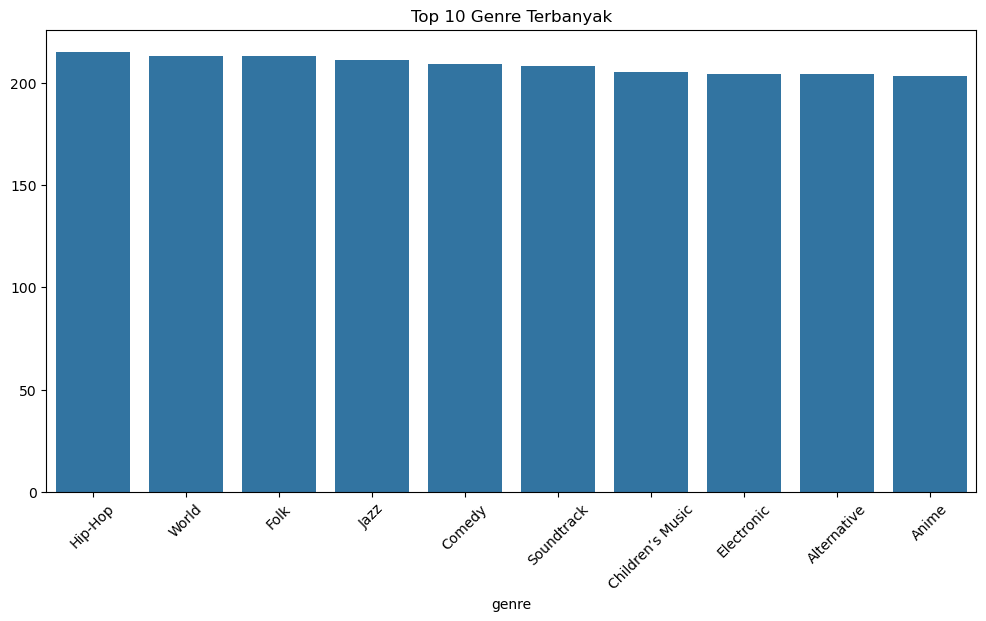

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_genres = df_subset['genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Top 10 Genre Terbanyak")
plt.xticks(rotation=45)
plt.show()


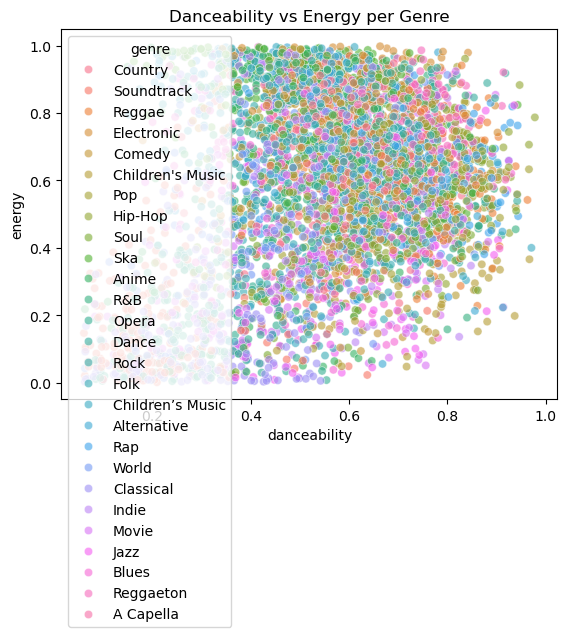

In [5]:
sns.scatterplot(data=df_subset, x='danceability', y='energy', hue='genre', alpha=0.6)
plt.title("Danceability vs Energy per Genre")
plt.show()


In [6]:
df_subset.to_csv("spotify_subset.csv", index=False)
track_refs.to_csv("track_refs.csv", index=False)
